In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
print("sex")
print(*list(data.sex.unique()))
print("smoker")
print(*list(data.smoker.unique()))
print("region")
print(*list(data.region.unique()))

sex
female male
smoker
yes no
region
southwest southeast northwest northeast


In [44]:
data["sex"] = data["sex"].astype("category")
data["smoker"] = data["smoker"].astype("category")
data["region"] = data["region"].astype("category")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [46]:
x = data.iloc[:,0:6]
y = data.iloc[:, -1]

In [47]:
from sklearn.preprocessing import OneHotEncoder

# perform one hot encoding on   sex , region and smoker
encoded_data = pd.get_dummies(x, columns = ['sex', 'region','smoker'])
encoded_data.head()


,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,0,0,1,0,1
1,18,33.770,1,0,1,0,0,1,0,1,0
2,28,33.000,3,0,1,0,0,1,0,1,0
3,33,22.705,0,0,1,0,1,0,0,1,0
4,32,28.880,0,0,1,0,1,0,0,1,0


In [48]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = encoded_data.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(encoded_data)
x = pd.DataFrame(scaler.transform(encoded_data))
x.columns = features

In [49]:
x

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,0.021739,0.321227,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1334,0.000000,0.429379,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,0.000000,0.562012,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1336,0.065217,0.264730,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [50]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [51]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost is: 161742305.8674542
Cost is: 31399137.459482104
Cost is: 22614517.905134976
Cost is: 20722225.028325245
Cost is: 20098119.721137077
Cost is: 19783621.144881785
Cost is: 19585126.897905797
Cost is: 19447249.492727853
Cost is: 19346343.483906996
Cost is: 19269558.458918296


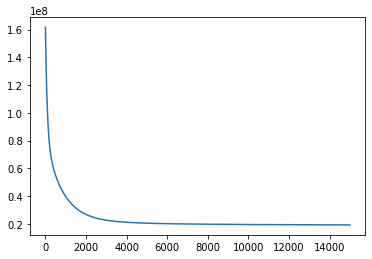

In [54]:
plt.plot(c)


In [55]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [56]:
y_pred

764      9472.654751
887      6952.586941
890     37005.362272
1293     9949.705548
259     26826.665938
            ...     
701     14002.867789
672      7107.378716
1163     2467.072183
1103    13995.883372
1295     1593.462420
Length: 402, dtype: float64

In [57]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.7672425226301759